adjacent day change mean = -0.0020873808570041614, std = 0.03848137901403451
68.0% among 1-sigma high = 0.03639399815703035, low = -0.040568759871038675
27.0% among 1-2 sigma high = 0.07487537717106486, low = -0.07905013888507319
4.7% among 2-3 sigma high = 0.11335675618509938, low = -0.11753151789910771
0.3% among 2-3 sigma outside high = 0.11335675618509938, low = -0.11753151789910771
adjacent day change mean = 0.001974662577742513, std = 0.03841084345499828
68.0% among 1-sigma high = 0.0403855060327408, low = -0.03643618087725577
27.0% among 1-2 sigma high = 0.07879634948773907, low = -0.07484702433225406
4.7% among 2-3 sigma high = 0.11720719294273735, low = -0.11325786778725233
0.3% among 2-3 sigma outside high = 0.11720719294273735, low = -0.11325786778725233


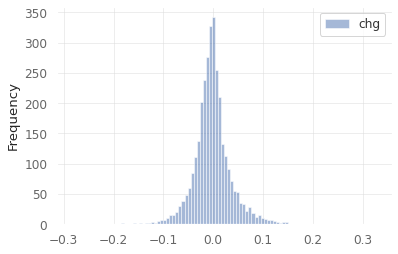

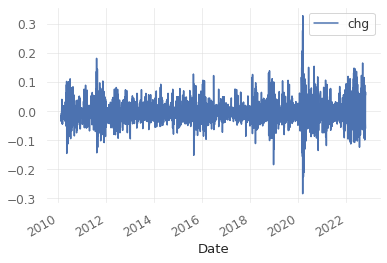

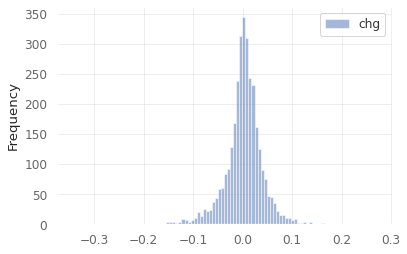

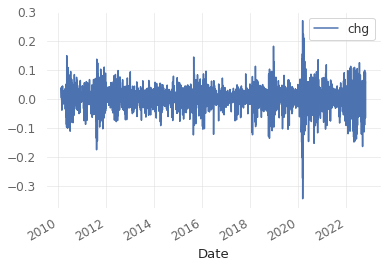

In [35]:
import json
import pickle
import math
import numpy as np
import pandas as pd
import datetime

def loadCacheData(target_symbol):
    # target_symbol = 'SQQQ'
    cache_raw_file = f'./{target_symbol}_stock_cache.pkl'
    with open(cache_raw_file, 'rb') as fi:
        data_raw = pickle.load(fi)
    return data_raw
#analyze adjacent day change histogram
def dailyChangeStat(price_df):
    analysis = pd.DataFrame(index = price_df.index)
    analysis['chg'] = price_df['Close'].shift(-1).div(price_df['Close']) - 1
    analysis.dropna(inplace=True)
    ax = analysis[['chg']].plot.hist(bins=100, alpha=0.5)
    analysis[['chg']].plot.line()
    m = analysis['chg'].mean()
    s = analysis['chg'].std()
    p1, p2, p3 = 0.68, 0.95, 0.997
    print(f'adjacent day change mean = {m}, std = {s}')
    print(f'{p1*100}% among 1-sigma high = {m+1*s}, low = {m-1*s}')
    print(f'{round((p2-p1),3)*100}% among 1-2 sigma high = {m+2*s}, low = {m-2*s}')
    print(f'{round((p3-p2),3)*100}% among 2-3 sigma high = {m+3*s}, low = {m-3*s}')
    print(f'{round((1-p3),3)*100}% among 2-3 sigma outside high = {m+3*s}, low = {m-3*s}')

first_date = datetime.datetime.strptime('2010-10-01', '%Y-%m-%d')
last_date = datetime.datetime.strptime('2022-10-29', '%Y-%m-%d')

target_symbol = 'SQQQ'
data_raw = loadCacheData(target_symbol)
price_df = data_raw[target_symbol]
dailyChangeStat(price_df)

target_symbol = 'TQQQ'
data_raw = loadCacheData(target_symbol)
price_df = data_raw[target_symbol]
dailyChangeStat(price_df)


<AxesSubplot:xlabel='Date'>

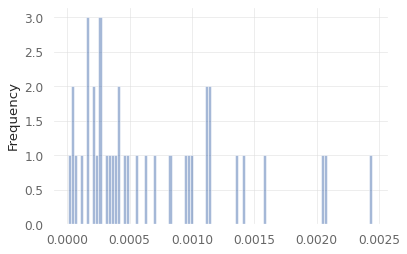

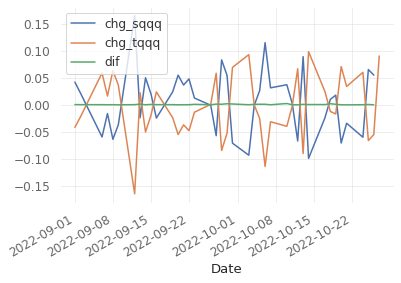

In [54]:
target_symbol = 'SQQQ'
data_raw_sqqq = loadCacheData(target_symbol)
price_df_sqqq = data_raw_sqqq[target_symbol]

target_symbol = 'TQQQ'
data_raw_tqqq = loadCacheData(target_symbol)
price_df_tqqq = data_raw_tqqq[target_symbol]

analysis = pd.DataFrame()
analysis['chg_sqqq'] = price_df_sqqq['Close'].shift(-1).div(price_df_sqqq['Close']) - 1
analysis['chg_tqqq'] = price_df_tqqq['Close'].shift(-1).div(price_df_tqqq['Close']) - 1
# print((price_df_tqqq['Close'].shift(-1).div(price_df_tqqq['Close']) - 1).head(4))
# print((price_df_sqqq['Close'].shift(-1).div(price_df_sqqq['Close']) - 1).head(4))
analysis['dif'] = (analysis['chg_sqqq'] + analysis['chg_tqqq']).abs()

first_date = datetime.datetime.strptime('2022-09-01', '%Y-%m-%d')
last_date = datetime.datetime.strptime('2022-10-29', '%Y-%m-%d')

ax = analysis['dif'][first_date:last_date].plot.hist(bins=100, alpha=0.5)
analysis[['chg_sqqq','chg_tqqq','dif']][first_date:last_date].plot.line()
# ax.plot.line()


In [11]:
import pandas as pd
rv = {'date': ['2022-11-06'], 'High': [100.0], 'Low': [20.0], 'Close': [40.0], 'Open': ['90'], 'Volume': [0.0]}
latest_price_1d = pd.DataFrame.from_dict(rv)#, orient='index')#,columns=['High','Low','Close','Open','Volume'])
print(latest_price_1d)

         date   High   Low  Close Open  Volume
0  2022-11-06  100.0  20.0   40.0   90     0.0


adjacent day change mean = 2.8374240407678246, std = 0.03205719528382431
adjacent day change abnormal high = 3.02530224817462


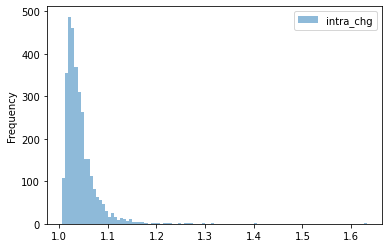

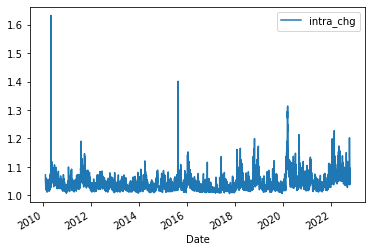

In [53]:
import pandas as pd
import numpy as np
#analyze intra-day change histogram
price_df = data_raw['TQQQ']
analysis = pd.DataFrame(index = price_df.index)
analysis['intra_chg'] = (price_df['High'].div(price_df['Low']))#.apply(np.log)
analysis.dropna(inplace=True)
ax = analysis[['intra_chg']].plot.hist(bins=100, alpha=0.5)
analysis[['intra_chg']].plot.line()
m = analysis['intra_chg'].mean()
s = analysis['intra_chg'].std()
print(f'adjacent day change mean = {np.exp(m)}, std = {s}')
print(f'adjacent day change abnormal high = {np.exp(m+2*s)}')
# analysis['chg']
# price_df.index[:3]


/tmp/ipykernel_5909/551475761.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['dif'] = x['Close'] - x['Close'].shift(1)
/home/gs/.local/share/virtualenvs/gs-KL75tqvG/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/tmp/ipykernel_5909/551475761.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

            dif
Date           
2022-08-11 -0.1
2022-08-12 -0.1
2022-08-15  0.0
2022-08-16  0.0
            dif     close2
Date                      
2022-08-11 -0.1  35.950001
2022-08-12 -0.1  37.980000
2022-08-15  0.0  38.889999
2022-08-16  0.0  38.639999
2022-08-17 -0.1  37.299999
2022-08-18 -0.1  37.549999
2022-08-19 -0.1  35.349998
2022-08-22 -0.1  32.570000
2022-08-23 -0.1  32.459999
2022-08-24 -0.1  32.709999
2022-08-25  0.0  34.430000
2022-08-26 -0.1  30.240000
2022-08-29 -0.2  29.309999
2022-08-30 -0.2  28.330000
2022-08-31 -0.2  27.809999
2022-09-01 -0.2  27.840000
2022-09-02 -0.2  26.680000
2022-09-06 -0.2  26.070000
2022-09-07 -0.1  27.610001
2022-09-08 -0.1  28.059999
2022-09-09 -0.1  29.840000
2022-09-12  0.0  30.930000
2022-09-13  0.0  25.840000
2022-09-14  0.1  26.420000
2022-09-15  0.1  25.090000
2022-09-16  0.0  24.600000
2022-09-19  0.1  25.190001
2022-09-20  0.1  24.590000
2022-09-21  0.0  23.240000
2022-09-22 -0.1  22.379999
2022-09-23 -0.2  21.309999
2022-09-26 -0

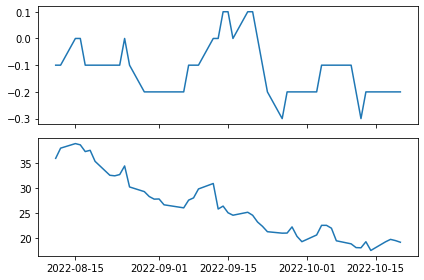

In [32]:
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np

nn=10

x = data_raw['TQQQ'].tail(60)#.apply(np.log).to_numpy()
# y = ((x - x.shift(1))>0) + ((x - x.shift(1))<=0) * -1
x['dif'] = x['Close'] - x['Close'].shift(1)
x.dropna(inplace=True)
x['dif'] = x['dif'].apply(lambda x:int(x>0)-0.5)
cg = x.rolling(nn).sum()/nn#* 0.5
cg.dropna(inplace=True)
y = cg[['dif']]
print(y.head(4))
y['close2']=x.loc[y.index]['Close']
# y.plot()
print(y)
fig, (p1, p2) = plt.subplots(2, 1, sharex=True)
p1.plot(y.index,y['dif'])
p2.plot(y.index,y['close2'])
fig.tight_layout()
plt.show()



100%|██████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.96it/s]


*** INFO: nasdaq done. Total tickles = 3
eval = 0.43478260869565216
2022, 9, 1
Starting Portfolio Value: 100.00
Final Portfolio Value: 102.91


/home/gs/.local/share/virtualenvs/gs-KL75tqvG/lib/python3.8/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


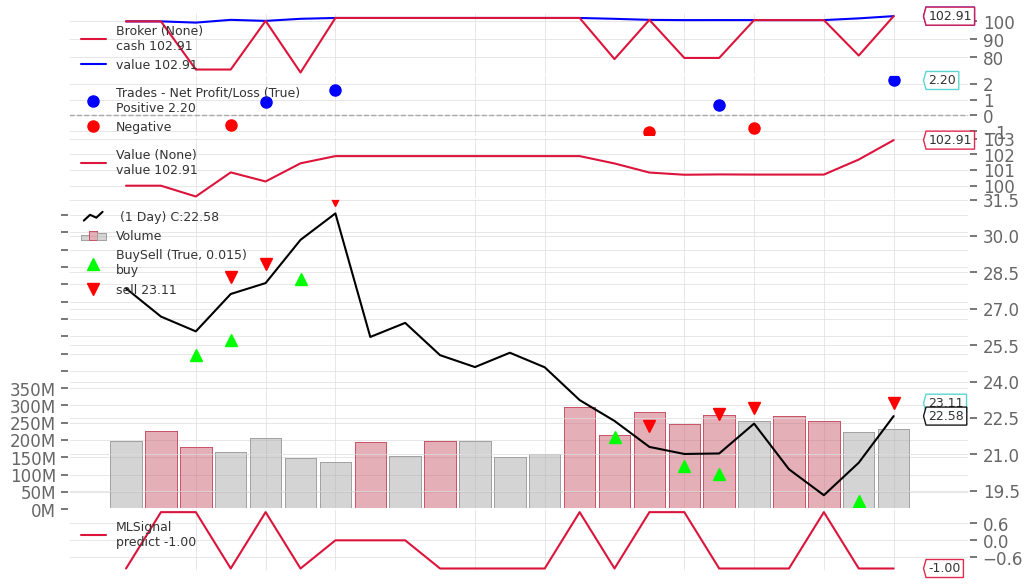

In [4]:
from ml_e2e_eval import run, e2eBacktest, configure
import datetime

param = configure('TQQQ', 'xgb')
# param['is_classifier'] = True #DO NOT Change
# param['is_realtime'] = False #DO NOT Change
# param['split_ratio'] = {'train': 0.7, 'dev': 0.1, 'eval': 0.2}

first_date = datetime.datetime.strptime('2022-08-01', '%Y-%m-%d') #datetime.datetime(2021, 1, 1) 
last_date = datetime.datetime.strptime('2022-10-04', '%Y-%m-%d') #datetime.datetime(2022, 9, 30)
param['is_classifier'] = True #DO NOT Change
param['is_realtime'] = True #DO NOT Change
param['split_ratio'] = {'train': 0.0, 'dev': 0.0, 'eval': 1.0}
param['first_date'] = first_date
param['last_date'] = last_date
param['is_offline_strategy'] = True

# param['first_date'] = first_date
# param['last_date'] = last_date
# param['is_offline_strategy'] = True
e2eBacktest(param)

# run()
